# i21-0328 - Sarim Aeyzaz - Assignment 3

In [ ]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

quandl.ApiConfig.api_key = 'k5hpQXTQmkr3f2cBYTDb'
names_of_company = ['HBL', 'UBL', 'ABL', 'BOP']

results = pd.DataFrame()

for names in names_of_company:
    x = quandl.get(f'PSX/{names}', start_date='2011-1-1', end_date='2022-5-1')
    x['Company'] = names
    results = pd.concat([results, x])

In [ ]:
# Getting seperate dataframe from main results dataframe and storing it in a list of subFrames
# Also assigning important lists such as years, months, names of companies and colors (2.0 default colors)

hbl = results.loc[results['Company']=='HBL'].copy()
ubl = results.loc[results['Company']=='UBL'].copy()
abl = results.loc[results['Company']=='ABL'].copy()
bop = results.loc[results['Company']=='BOP'].copy()

years = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
months = ['Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
names = ['HBL', 'UBL', 'ABL', 'BOP']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
subFrames = [hbl, ubl, abl, bop]

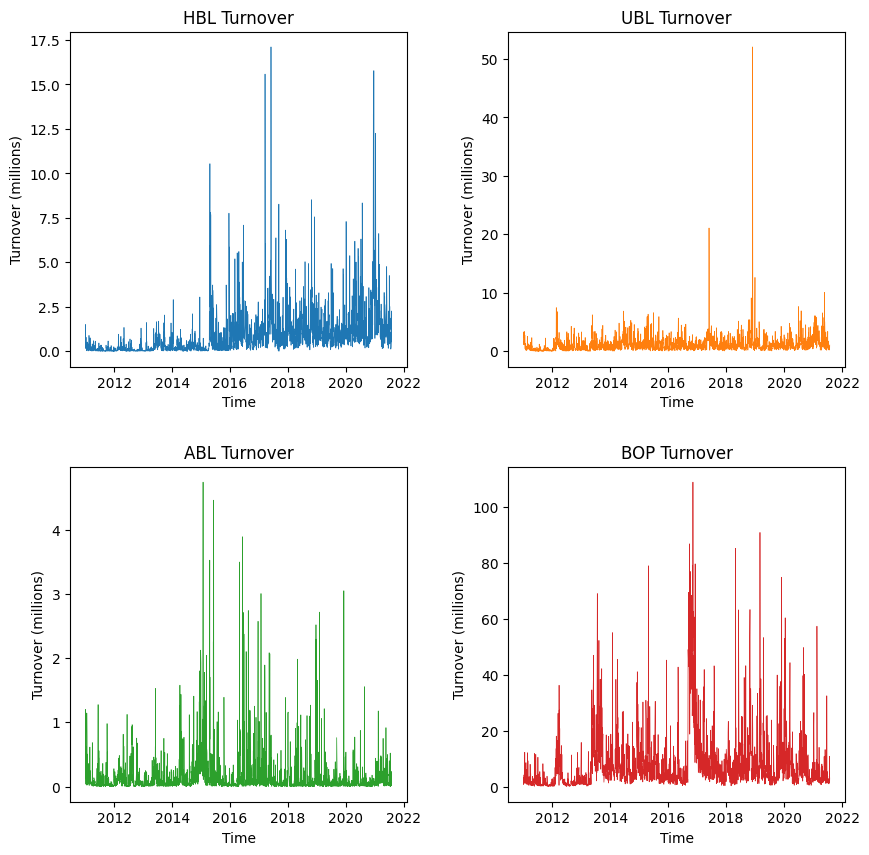

In [ ]:
# Set figure size to be 10 x 10, then loop over every bank in subframe, then plot it's its title, Turnover values accordingly
# At the end I adjusted the horizontal and vertical space a bit to make the plots look nicer

plt.figure(figsize=(10, 10))

for bank, i in zip(subFrames, range(4)):
    plt.subplot(2, 2, i+1)
    plt.title(f'{names[i]} Turnover')
    plt.xlabel('Time')
    plt.ylabel('Turnover (millions)')
    plt.plot(bank.index, bank.Turnover/1000000, color = colors[i], linewidth=0.5)

plt.subplots_adjust(wspace=0.3, hspace=0.3)

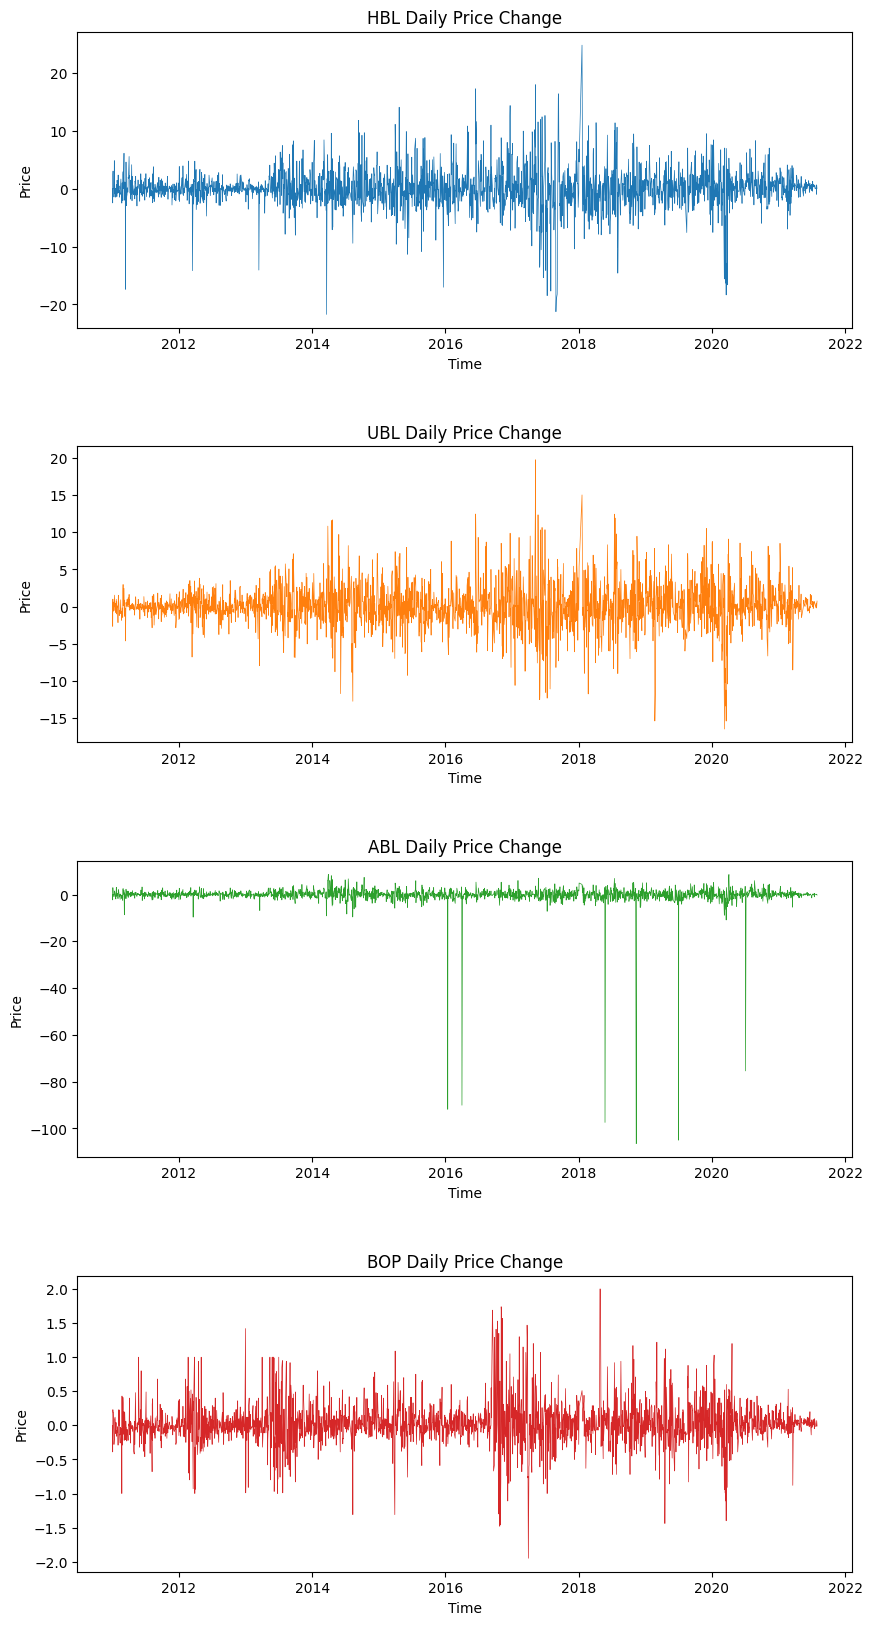

In [ ]:
# Set figure size as 10 x 20, then create a new 'Price Change' column for each bank's dataframe by subtracting the
# open price with previous open price (set previous open price as first index if it didn't exist).
# Then plot each Bank's daily price change according to the new 'Price Change' column

plt.figure(figsize=(10, 20))

for bank, i in zip(subFrames, range(4)):
    previous = bank['Open'][0]
    change = []
    for openPrice , closePrice in zip(bank.Open, bank.Close):
        change.append(openPrice - previous)
        previous = closePrice
    bank['Price Change'] = change

    plt.subplot(4, 1, i+1)
    plt.title(f'{names[i]} Daily Price Change')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.plot(bank.index, bank['Price Change'], color = colors[i], linewidth=0.5)

plt.subplots_adjust(wspace=0.2, hspace=0.4)

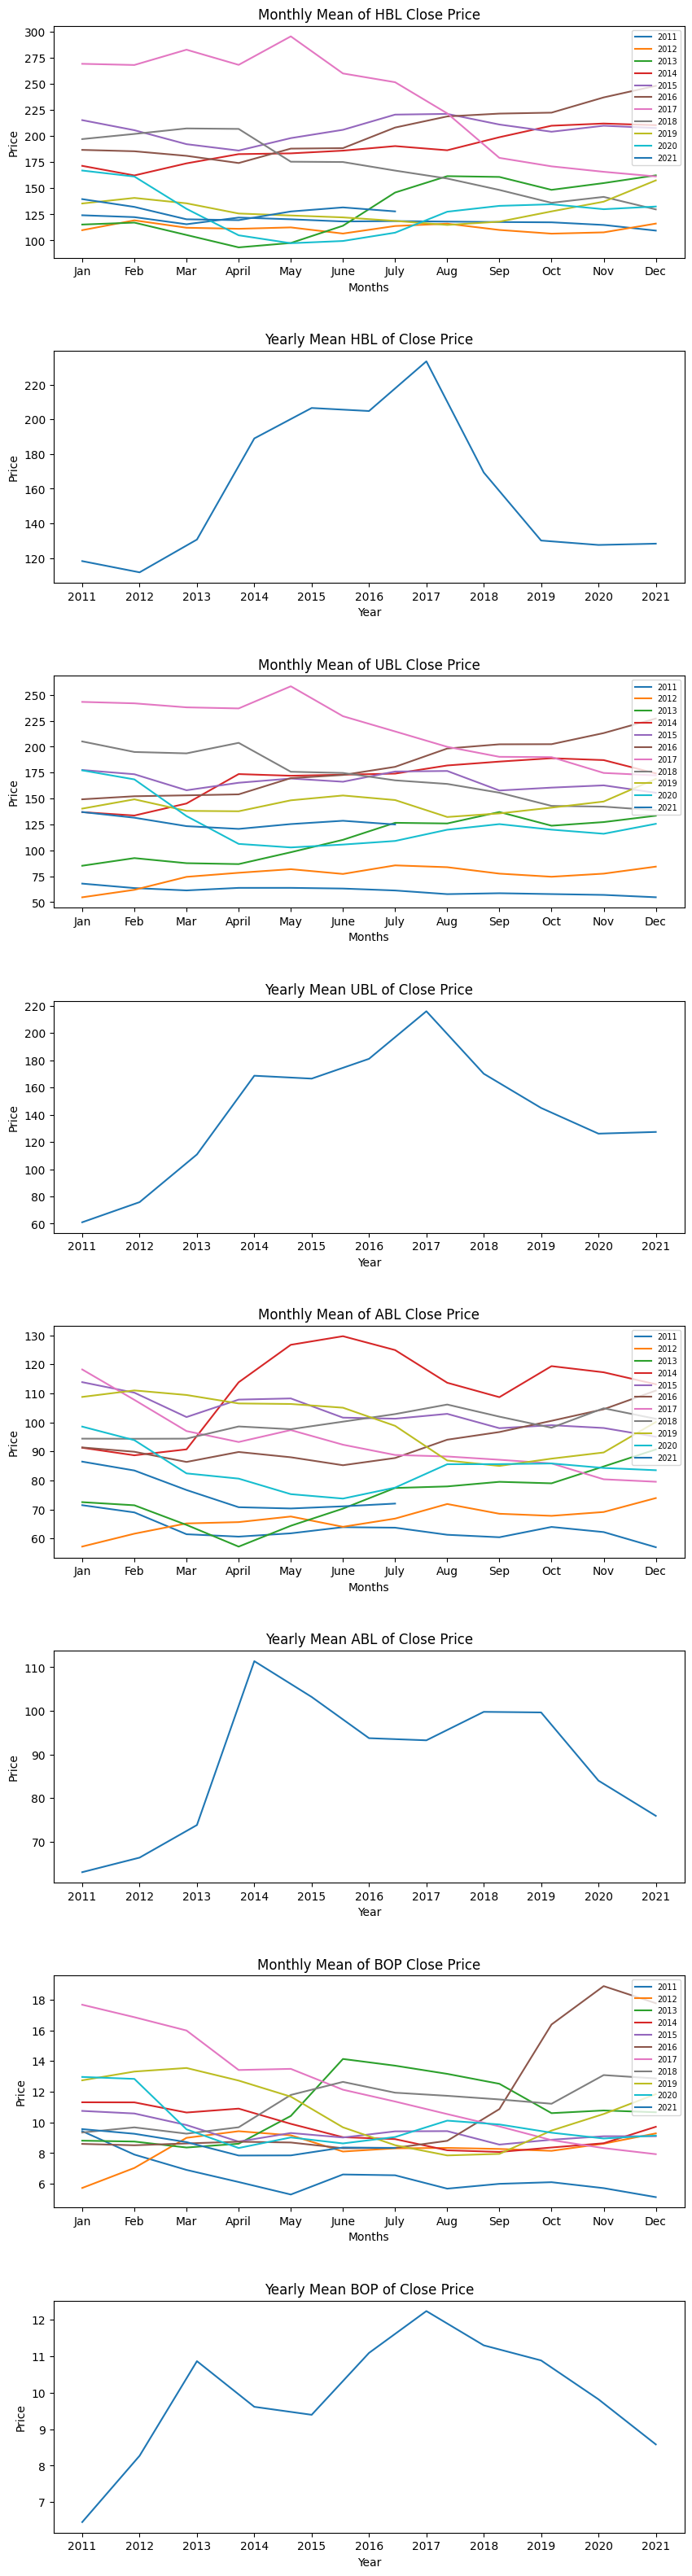

In [ ]:
# Set figure size as 10 x 40. For each bank, get a list of every year's month's mean using groupby. This will get you every
# year's 12 mean values of each month and stores it in a list. Then append 5 np.nan values in the list as the last year only
# has data for 7 months.
# Now plot all the year's mean on a single plot using loops and slicing, label and add the legend accordingly
# For the years graph, just groupby the entire dataframe by year and calculate 'Close' column's mean and plot it

plt.figure(figsize=(10, 40))

for bank, i in zip(subFrames, range(4)):
    ls = [x for x in bank.groupby(by=[bank.index.year, bank.index.month])['Close'].mean()]
    for num in range(5):
        ls.append(np.nan)

    plt.subplot(8, 1, (2 * i) + 1)
    for x in range(0, len(ls), 12):
        plt.plot(months, ls[x:x+12])
    plt.title(f"Monthly Mean of {names[i]} Close Price")
    plt.xlabel("Months")
    plt.ylabel("Price")
    plt.gca().legend(years, fontsize=7, loc=1)

    plt.subplot(8, 1, (2 * i) + 2)
    plt.plot(years, bank.groupby(bank.index.year)['Close'].mean())
    plt.title(f"Yearly Mean {names[i]} of Close Price")
    plt.xlabel("Year")
    plt.ylabel("Price")

plt.subplots_adjust(wspace=0.2, hspace=0.4)

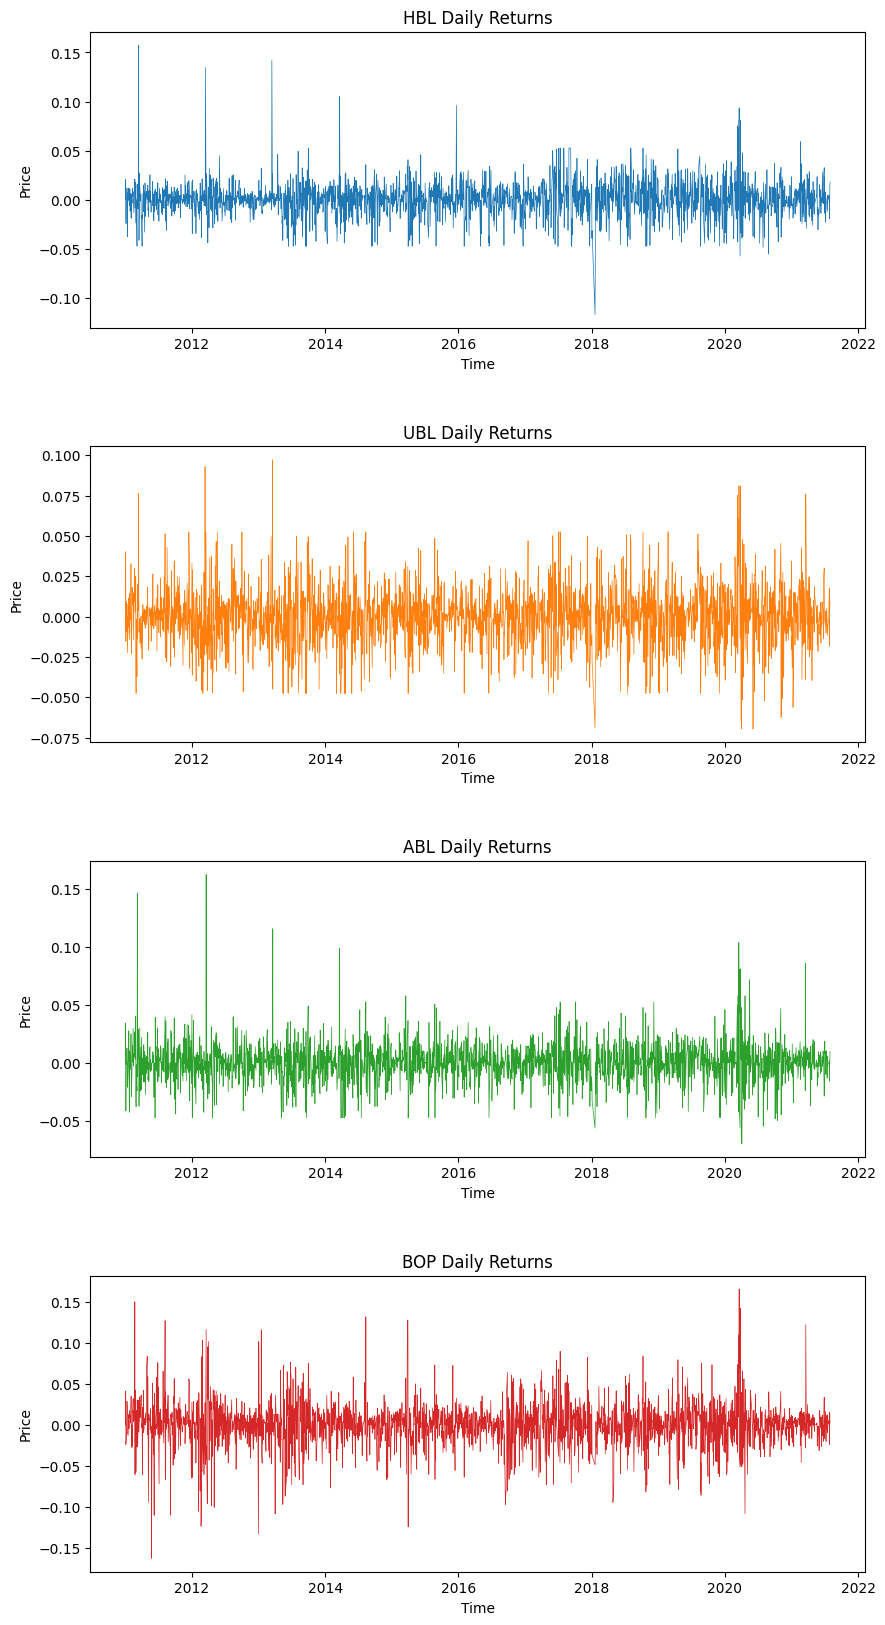

In [ ]:
# Set figure size as 10 x 20, then create a new 'Daily Returns' column for each bank's dataframe by subtracting the
# close price with previous close price (set previous close price as first index if it didn't exist).
# Then plot each Bank's Daily Returns according to the new 'Daily Returns' column

plt.figure(figsize=(10, 20))

for bank, i in zip(subFrames, range(4)):
    previous = bank['Close'][0]
    returns = []
    for closePrice in bank.Close:
        returns.append((previous / closePrice) - 1)
        previous = closePrice
    bank['Daily Returns'] = returns

    plt.subplot(4, 1, i+1)
    plt.title(f'{names[i]} Daily Returns')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.plot(bank.index, bank['Daily Returns'], color = colors[i], linewidth=0.5)

plt.subplots_adjust(wspace=0.2, hspace=0.4)

In [ ]:
# Set a random value to high number and update it for lowest value in Daily Returns and vice versa for a random
# value with a low number. Also store the index's of these updated values as they are the dates
# Finally, print the dates and value associated

for bank, name in zip(subFrames, names):
    low, lowDate, high, highDate = 10000, "None", -10000, "None"
    for value in bank['Daily Returns']:
        if value < low:
            low, lowDate = round(value, 5), bank.loc[bank['Daily Returns'] == value].index[0]
        if value > high:
            high, highDate = round(value, 5), bank.loc[bank['Daily Returns'] == value].index[0]
    print(f"{name} had highest single day return at {highDate} ({high}). \n{name} had lowest single day return at {lowDate} ({low})\n")

HBL had highest single day return at 2011-03-15 00:00:00 (0.15745). 
HBL had lowest single day return at 2018-01-19 00:00:00 (-0.11714)

UBL had highest single day return at 2013-03-19 00:00:00 (0.09726). 
UBL had lowest single day return at 2020-06-03 00:00:00 (-0.06969)

ABL had highest single day return at 2012-03-20 00:00:00 (0.16263). 
ABL had lowest single day return at 2020-04-03 00:00:00 (-0.06972)

BOP had highest single day return at 2020-03-19 00:00:00 (0.16598). 
BOP had lowest single day return at 2011-05-26 00:00:00 (-0.1626)



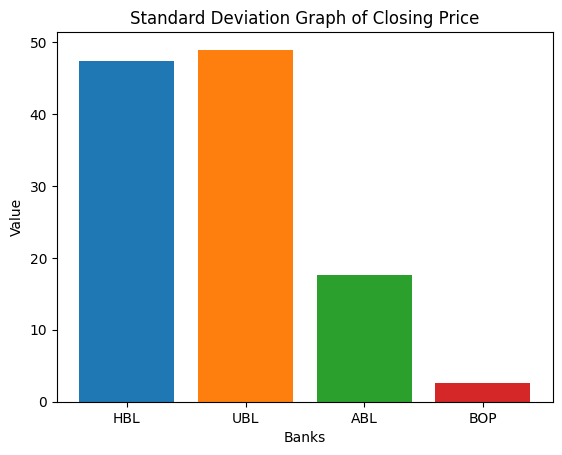

In [ ]:
# Create a standard deviation list and append it with every bank's Close Price's standard deviation
# Then plot this standard deviation list and compare the bars to deduce the answer

stddev =[]
for bank in subFrames:
    stddev.append(bank['Close'].std())

plt.title('Standard Deviation Graph of Closing Price')
plt.xlabel('Banks')
plt.ylabel('Value')
plt.bar(names, stddev, color = colors)
plt.show()

# print(f"{names[stddev.index(max(stddev))]} is the riskiest bank stock as it's closing price's standard deviation is {round(max(stddev), 2)}")

### UBL Bank is the riskiest bank to invest in as it has had the highest standard deviation on its closing price

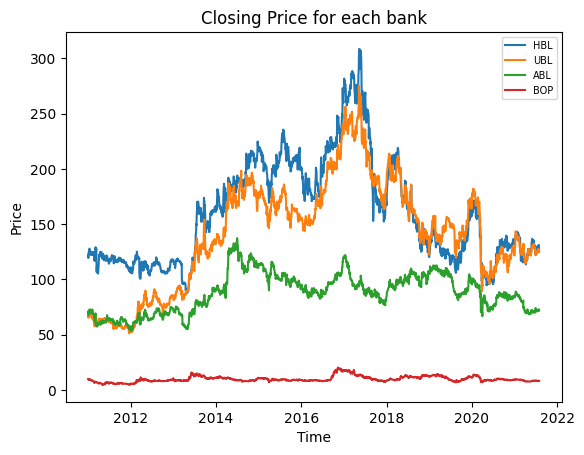

In [ ]:
# Plot each bank's closing price with respect to its date. Then label it properly and add a legend

for bank in subFrames:
    plt.plot(bank.index, bank['Close'])

plt.title(f"Closing Price for each bank")
plt.xlabel("Time")
plt.ylabel("Price")
plt.gca().legend(names, fontsize=7, loc=1)
plt.show()

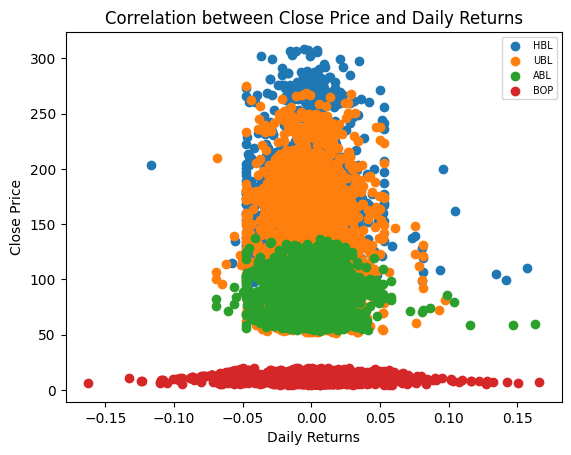

In [ ]:
# Create a scatterplot between daily returns and close price and setup the graph properly

for bank in subFrames:
    plt.scatter(bank['Daily Returns'], bank['Close'])
plt.title("Correlation between Close Price and Daily Returns")
plt.xlabel("Daily Returns")
plt.ylabel("Close Price")
plt.gca().legend(names, fontsize=7, loc=1)
plt.show()

### It seems that even though BOP has lower close price than the rest, it has a higher deviation of daily returns than the rest of the banks

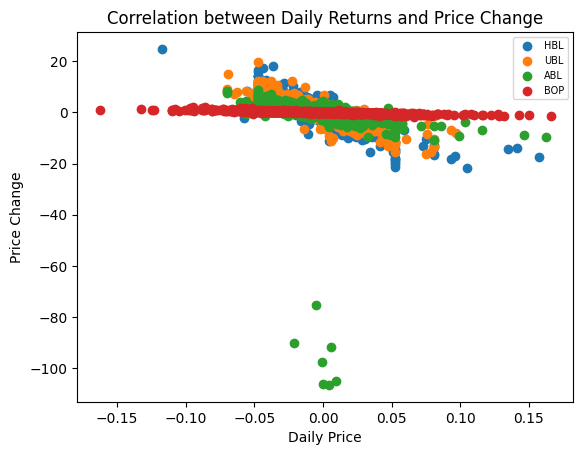

In [ ]:
# Create a scatterplot between daily returns and Price Change and setup the graph properly

for bank in subFrames:
    plt.scatter(bank['Daily Returns'], bank['Price Change'])
plt.title("Correlation between Daily Returns and Price Change")
plt.xlabel("Daily Price")
plt.ylabel("Price Change")
plt.gca().legend(names, fontsize=7, loc=1)
plt.show()

### BOP has more variance in Daily Price while remaining consistent in Price Change, whereas HBL, UBL and ABL have lesser variance in Daily Price but have more variance in Price Change. Also, we notice that price change of HBL, UBL and ABL goes down the more daily price increases

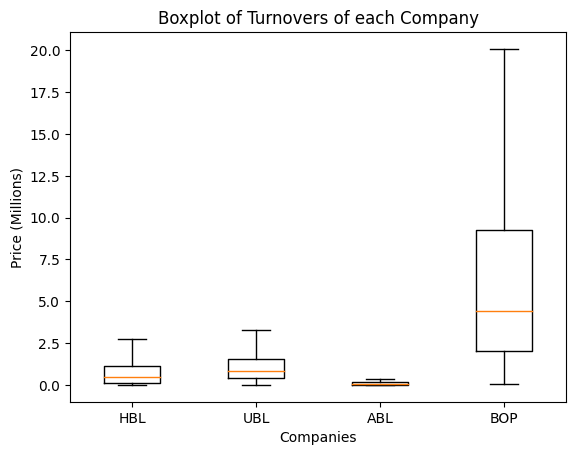

In [ ]:
# Create a turnoverList and add each bank's turnover into it, then finally plot the data into boxplot and setup the graph

turnoverList = []
for bank in subFrames:
    turnoverList.append(bank['Turnover']/1000000)
plt.boxplot(turnoverList, showfliers=False, labels = names)
plt.title("Boxplot of Turnovers of each Company")
plt.ylabel("Price (Millions)")
plt.xlabel("Companies")
plt.show()

### BOP has the highest variance in terms of turnovers while ABL has the lowest amount of variance according to the box plot. HBL and UBL have about the same variance when compared to either ABL or BOP